In [1]:
# Dependencies
import csv, os #>, requests, json, pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read CSV into Pandas DataFrame
olympics_df = pd.read_csv('olympics_df.csv')

olympics_df.tail()

,Name,Sex,Age,Height,Weight,NOC,Region,Medal,Sport,Event,Year,Season,City
271111,Luis Fernando Lpez Erazo,M,37.0,166.0,60.0,COL,Colombia,NaN,Athletics,Athletics Men's 20 kilometres Walk,2016,Summer,Rio de Janeiro
271112,Enrico D'Aniello,M,20.0,152.0,53.0,ITA,Italy,NaN,Rowing,Rowing Men's Coxed Eights,2016,Summer,Rio de Janeiro
271113,Sabrina D'Angelo,F,23.0,173.0,71.0,CAN,Canada,Bronze,Football,Football Women's Football,2016,Summer,Rio de Janeiro
271114,Andrea Mitchell D'Arrigo,M,21.0,194.0,85.0,ITA,Italy,NaN,Swimming,Swimming Men's 200 metres Freestyle,2016,Summer,Rio de Janeiro
271115,Blair Tarrant,M,26.0,185.0,83.0,NZL,New Zealand,NaN,Hockey,Hockey Men's Hockey,2016,Summer,Rio de Janeiro


In [3]:
olympics_df.count()

Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
NOC       271116
Region    270746
Medal      39783
Sport     271116
Event     271116
Year      271116
Season    271116
City      271116
dtype: int64

---
## Number of events an athlete has participated in

In [4]:
olympics_groupedby_ID = olympics_df.groupby('Name')

event_count = olympics_groupedby_ID.count()['Sex'].sort_values(ascending=False)

event_count.head()

Name
Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Name: Sex, dtype: int64

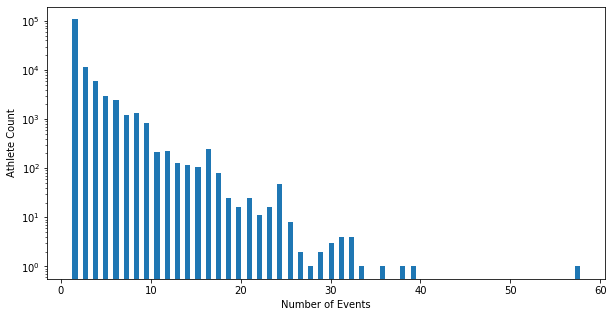

In [5]:
plt.figure(0,(10,5))
plt.hist(event_count, bins=50, log=True, rwidth=0.5)
plt.xlabel("Number of Events")
plt.ylabel("Athlete Count")
plt.show()

In [6]:
quartiles = event_count.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
median_temp = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Event Count is: {lowerq}")
print(f"The upper quartile of Event Count is: {upperq}")
print(f"The interquartile range of Event Count is: {iqr}")
print(f"The the median of Event Count is: {median_temp} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#> print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Event Count is: 1.0
The upper quartile of Event Count is: 2.0
The interquartile range of Event Count is: 1.0
The the median of Event Count is: 1.0 
Values above 3.5 could be outliers.


## Number of events an athlete *who has medalled* has participated in

In [7]:
olympics_groupedby_ID_df = pd.DataFrame(olympics_groupedby_ID.count())

In [8]:
medalled_olymians_df = olympics_groupedby_ID_df.loc[olympics_groupedby_ID_df['Medal'] > 0]

In [9]:
medalled_groupedby_ID = medalled_olymians_df.groupby('Name')

medalled_event_count = medalled_groupedby_ID.max()['Sex'].sort_values(ascending=False)

medalled_event_count.head()

Name
Robert Tait McKenzie                58
Heikki Ilmari Savolainen            39
Ioannis Theofilakis                 36
Takashi Ono                         33
Alfrd (Arnold-) Hajs (Guttmann-)    32
Name: Sex, dtype: int64

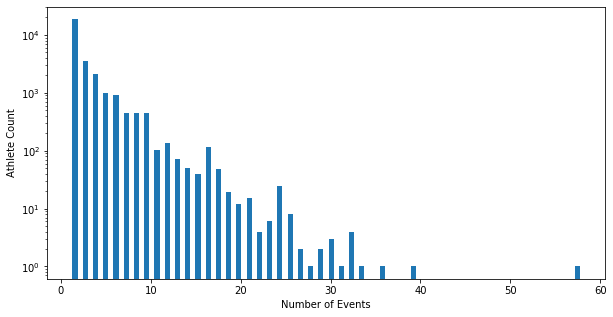

In [10]:
plt.figure(0,(10,5))
plt.hist(medalled_event_count, bins=50, log=True, rwidth=0.5)
plt.xlabel("Number of Events")
plt.ylabel("Athlete Count")
plt.show()

In [11]:
quartiles = medalled_event_count.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
median_temp = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Event Count is: {lowerq}")
print(f"The upper quartile of Event Count is: {upperq}")
print(f"The interquartile range of Event Count is: {iqr}")
print(f"The the median of Event Count is: {median_temp} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#> print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Event Count is: 1.0
The upper quartile of Event Count is: 3.0
The interquartile range of Event Count is: 2.0
The the median of Event Count is: 2.0 
Values above 6.0 could be outliers.


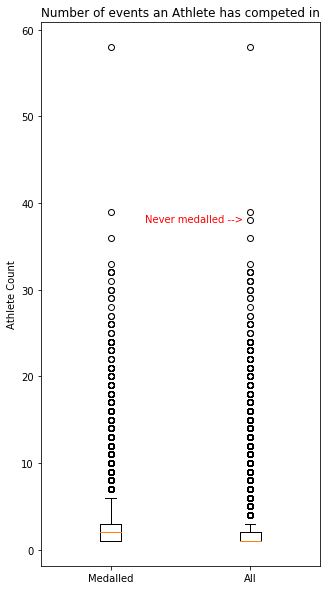

In [12]:
plt.figure(0,(5,10))
plt.title('Number of events an Athlete has competed in')
plt.ylabel('Athlete Count')
plt.boxplot([medalled_event_count, event_count])
plt.xticks([1,2],['Medalled', 'All'])

# Here we see someone who competed in 38 events yet never once medalled
plt.annotate('Never medalled -->',(1.25,37.75),fontsize=10,color="red")
plt.show()

#### So who is Joseph "Josy" Stoffel?  
* Born on June 27th, 1928 (currently age 91) he went to 5 Summer Olympic games between 1948 to 1964.  From age 20 to 36 he competed on behalf of Luxembourg in 7-8 Gymnastics events per trip. Unfortunately he did not finish within the top three in any of his 38 competitions. But not for nothing, Stoffel dominated the domestic scene, and won the Luxembourgian national gymnastics championships for sixteen straight years, from 1949 until 1964. 

## *Calculate the chances of winning a metal if you attend the olympics, then see what Josy's chances were.*
---

## Female Medal Count vs Women's Freedom

In [13]:
# Read CSV into Pandas DataFrame
raw_WPS_df = pd.read_csv('raw_data/WPS_Index_Raw_Data.csv')
WPS_df = raw_WPS_df[[
 'WPS Index rank',
 'Country and group',
 'WPS Index value']]
WPS_df = WPS_df.rename(columns={'Country and group': 'Region'})
WPS_df.head()

,WPS Index rank,Region,WPS Index value
0,1,Norway,0.904
1,2,Switzerland,0.893
2,3,Finland,0.891
3,3,Denmark,0.891
4,5,Iceland,0.888


In [14]:
WPS_df = WPS_df.dropna(how='all')
WPS_df.head(20)

,WPS Index rank,Region,WPS Index value
0,1,Norway,0.904
1,2,Switzerland,0.893
2,3,Finland,0.891
3,3,Denmark,0.891
4,5,Iceland,0.888
5,6,Austria,0.884
6,7,United Kingdom,0.883
7,8,Luxembourg,0.880
8,9,Sweden,0.879
9,9,Netherlands,0.879


#### Now we start working on the Olympics DF

In [15]:
slim_olympics_df = olympics_df.drop(['Height', 'Weight', 'City'],1)

In [16]:
recent_olympics_df = slim_olympics_df.loc[olympics_df.Year >= 2014]

In [17]:
recent_olympics_WPS_df = pd.merge(recent_olympics_df, WPS_df, on='Region', how='left')
recent_olympics_WPS_df.count()

Name               18579
Sex                18579
Age                18579
NOC                18579
Region             18534
Medal               2620
Sport              18579
Event              18579
Year               18579
Season             18579
WPS Index rank     17760
WPS Index value    17760
dtype: int64

In [18]:
medalled_recent_WPS_df = recent_olympics_WPS_df.loc[
    (recent_olympics_WPS_df.Medal == 'Bronze') | 
    (recent_olympics_WPS_df.Medal == 'Silver') | 
    (recent_olympics_WPS_df.Medal == 'Gold')]

medalled_recent_WPS_df.count()

Name               2620
Sex                2620
Age                2620
NOC                2620
Region             2619
Medal              2620
Sport              2620
Event              2620
Year               2620
Season             2620
WPS Index rank     2578
WPS Index value    2578
dtype: int64

In [19]:
print("Unfortunately the following countries don't have WPS scores:")
list(medalled_recent_WPS_df.loc[
    medalled_recent_WPS_df['WPS Index rank'].isnull() == True].Region.unique())

Unfortunately the following countries don't have WPS scores:


['Venezuela',
 'Cuba',
 'North Korea',
 'Bahamas',
 'Kosovo',
 'Vietnam',
 'Individual Olympic Athletes',
 'Taiwan',
 nan,
 'Ivory Coast',
 'Grenada',
 'Puerto Rico']

In [23]:
print(f"Thankfully they only account for {round(100*(medalled_recent_WPS_df.Name.count()-medalled_recent_WPS_df['WPS Index rank'].count())/medalled_recent_WPS_df.Name.count(),1)}% of the medals")

Thankfully they only account for 1.6% of the medals


In [24]:
medalled_recent_WPS_df = medalled_recent_WPS_df.dropna()

medalled_recent_WPS_df.count() #2578

Name               2578
Sex                2578
Age                2578
NOC                2578
Region             2578
Medal              2578
Sport              2578
Event              2578
Year               2578
Season             2578
WPS Index rank     2578
WPS Index value    2578
dtype: int64

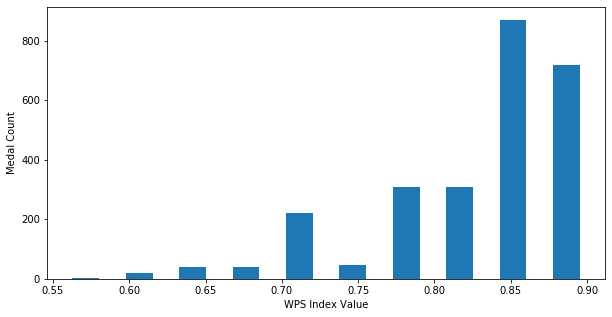

In [25]:
plt.figure(0,(10,5))
plt.hist(medalled_recent_WPS_df['WPS Index value'], bins=10, rwidth=0.5)
plt.xlabel("WPS Index Value")
plt.ylabel("Medal Count")
plt.show()

In [54]:
female_medalled_recent_WPS_df = medalled_recent_WPS_df.loc[
    medalled_recent_WPS_df.Sex == 'F']
male_medalled_recent_WPS_df = medalled_recent_WPS_df.loc[
    medalled_recent_WPS_df.Sex == 'M']

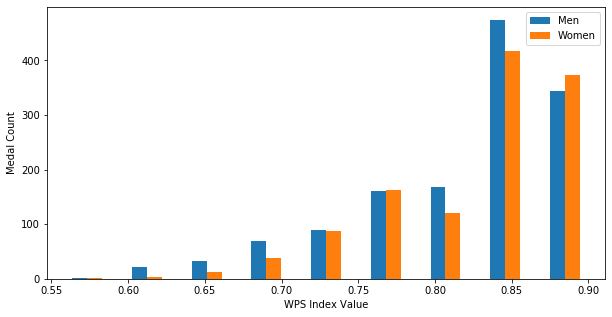

In [27]:
plt.figure(0,(10,5))
plt.hist([male_medalled_recent_WPS_df['WPS Index value'], 
          female_medalled_recent_WPS_df['WPS Index value']], 
         label=['Men', 'Women'], bins=9, rwidth=0.5)
plt.xlabel("WPS Index Value")
plt.ylabel("Medal Count")
plt.legend()
plt.show()

### This histogram shows that countries in the 90th percentile of women's freedom see their female athletes bring home more metals than their male athletes. 
---

In [28]:
female_medalled_groupedby_region = female_medalled_recent_WPS_df.groupby('Region')
male_medalled_groupedby_region = male_medalled_recent_WPS_df.groupby('Region')

gender_medalled_df = pd.merge(
    female_medalled_groupedby_region.Medal.count(), 
    male_medalled_groupedby_region.Medal.count(), 
    on='Region', how='outer', suffixes=['_Females', '_Males'])

gender_medalled_df = gender_medalled_df.fillna(0)

gender_medalled_df['Medal_Total'] = gender_medalled_df.Medal_Males + gender_medalled_df.Medal_Females

gender_medalled_df

,Medal_Females,Medal_Males,Medal_Total
Region,,,
Argentina,2.0,20.0,22.0
Australia,41.0,44.0,85.0
Austria,9.0,20.0,29.0
Azerbaijan,4.0,14.0,18.0
Bahrain,2.0,0.0,2.0
...,...,...,...
Qatar,0.0,1.0,1.0
Tajikistan,0.0,1.0,1.0
Trinidad,0.0,1.0,1.0


In [29]:
gender_medalled_df['Percent_Female'] = round(
    100*gender_medalled_df.Medal_Females / (gender_medalled_df.Medal_Males + gender_medalled_df.Medal_Females),2)

gender_medalled_df['Percent_Male'] = round(
    100*gender_medalled_df.Medal_Males / (gender_medalled_df.Medal_Males + gender_medalled_df.Medal_Females),2)

gender_medalled_df

,Medal_Females,Medal_Males,Medal_Total,Percent_Female,Percent_Male
Region,,,,,
Argentina,2.0,20.0,22.0,9.09,90.91
Australia,41.0,44.0,85.0,48.24,51.76
Austria,9.0,20.0,29.0,31.03,68.97
Azerbaijan,4.0,14.0,18.0,22.22,77.78
Bahrain,2.0,0.0,2.0,100.00,0.00
...,...,...,...,...,...
Qatar,0.0,1.0,1.0,0.00,100.00
Tajikistan,0.0,1.0,1.0,0.00,100.00
Trinidad,0.0,1.0,1.0,0.00,100.00


In [30]:
gender_medalled_df = pd.merge(gender_medalled_df, WPS_df, 
                              on='Region', how='left')
gender_medalled_df

,Region,Medal_Females,Medal_Males,Medal_Total,Percent_Female,Percent_Male,WPS Index rank,WPS Index value
0,Argentina,2.0,20.0,22.0,9.09,90.91,48,0.775
1,Australia,41.0,44.0,85.0,48.24,51.76,22,0.844
2,Austria,9.0,20.0,29.0,31.03,68.97,6,0.884
3,Azerbaijan,4.0,14.0,18.0,22.22,77.78,123,0.650
4,Bahrain,2.0,0.0,2.0,100.00,0.00,83,0.719
...,...,...,...,...,...,...,...,...
70,Qatar,0.0,1.0,1.0,0.00,100.00,72,0.730
71,Tajikistan,0.0,1.0,1.0,0.00,100.00,96,0.701
72,Trinidad,0.0,1.0,1.0,0.00,100.00,41,0.788
73,United Arab Emirates,0.0,1.0,1.0,0.00,100.00,44,0.781


The r-squared is: 0.0169784838781401


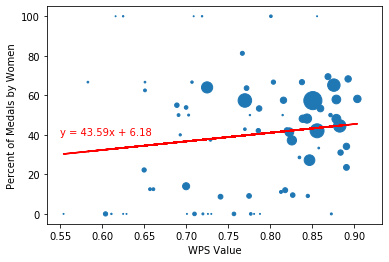

In [31]:
x_values = gender_medalled_df['WPS Index value']
y_values = gender_medalled_df['Percent_Female']
z_values = gender_medalled_df['Medal_Total']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, s=z_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.55,40),fontsize=10,color="red")
plt.ylabel('Percent of Medals by Women')
plt.xlabel('WPS Value')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [32]:
coefficient = stats.pearsonr(
    gender_medalled_df['WPS Index value'],gender_medalled_df['Percent_Female'])[0]
pvalue = stats.pearsonr(
    gender_medalled_df['WPS Index value'],gender_medalled_df['Percent_Female'])[1]

print(f"The correlation is {round(coefficient,4)} and the p-value is {pvalue}")

The correlation is 0.1303 and the p-value is 0.26517227530555165


The correlation value (r) is: 0.37028102273850627


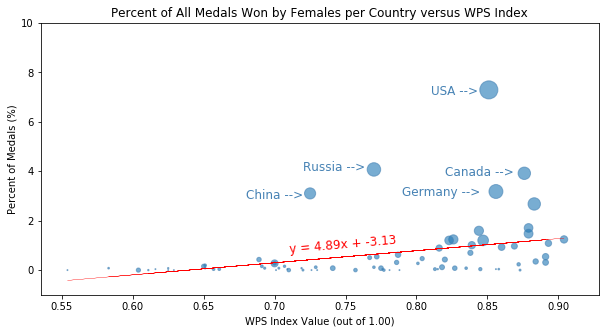

In [33]:
x_values = gender_medalled_df['WPS Index value']
y_values = gender_medalled_df['Percent_Female']*(
    (gender_medalled_df.Medal_Males + gender_medalled_df.Medal_Females)
    /(gender_medalled_df.Medal_Males.sum() + gender_medalled_df.Medal_Females.sum()))
z_values = gender_medalled_df['Medal_Total']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(0,(10,5))
plt.scatter(x_values, y_values, s=z_values, edgecolor='steelblue', alpha=.6)
plt.plot(x_values,regress_values,"r-",lw=.2)
plt.annotate(line_eq,(.71,.7),fontsize=12,color="red", rotation=5)
plt.annotate('USA -->',(.81,7.1),fontsize=12,color="steelblue")
plt.annotate('Russia -->',(.72,4.0),fontsize=12,color="steelblue")
plt.annotate('Canada -->',(.82,3.8),fontsize=12,color="steelblue")
plt.annotate('Germany -->',(.79,3.0),fontsize=12,color="steelblue")
plt.annotate('China -->',(.68,2.9),fontsize=12,color="steelblue")
plt.title('Percent of All Medals Won by Females per Country versus WPS Index')
plt.xlabel('WPS Index Value (out of 1.00)')
plt.ylabel('Percent of Medals (%)')
plt.ylim(-1,10)
print(f"The correlation value (r) is: {rvalue}")
plt.show()

In [34]:
coefficient = stats.pearsonr(
    gender_medalled_df['WPS Index value'],y_values)[0]
pvalue = stats.pearsonr(
    gender_medalled_df['WPS Index value'],y_values)[1]

print(f"The correlation is {round(coefficient,4)} and the p-value is {pvalue}")

The correlation is 0.3703 and the p-value is 0.0010757485921077444


In [35]:
# This was just to find the top 5 countries and label them
gender_medalled_df.sort_values('Medal_Females', ascending=False)

,Region,Medal_Females,Medal_Males,Medal_Total,Percent_Female,Percent_Male,WPS Index rank,WPS Index value
59,United States of America,188.0,140.0,328.0,57.32,42.68,19,0.851
45,Russia,105.0,78.0,183.0,57.38,42.62,51,0.770
10,Canada,101.0,54.0,155.0,65.16,34.84,11,0.876
20,Germany,82.0,113.0,195.0,42.05,57.95,17,0.856
11,China,80.0,45.0,125.0,64.00,36.00,76,0.725
...,...,...,...,...,...,...,...,...
64,Fiji,0.0,13.0,13.0,0.00,100.00,58,0.757
62,Dominican Republic,0.0,1.0,1.0,0.00,100.00,74,0.726
61,Armenia,0.0,4.0,4.0,0.00,100.00,82,0.720
60,Algeria,0.0,2.0,2.0,0.00,100.00,143,0.611


## vs GDP per Capita

In [36]:
# Read CSV into Pandas DataFrame
GDPpC_df = pd.read_csv('raw_data/CLEAN-GDPPC-USD-countries.csv')

GDPpC_df.head()

,CountryID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,4,Afghanistan,292,251,240,168,124,179,166,156,...,443,551,637,685,670,639,599,572,593,552
1,8,Albania,653,487,467,532,598,769,1033,718,...,4051,4046,4402,4228,4400,4567,3939,4109,4516,5224
2,12,Algeria,2397,1764,1817,1840,1500,1459,1600,1616,...,3883,4481,5456,5592,5500,5493,4178,3946,4044,4115
3,20,Andorra,23886,24714,25999,20900,20542,23359,24064,23224,...,43336,39734,41103,38393,40629,42299,36041,37223,39231,42052
4,24,Angola,1153,1321,1468,1030,1026,476,606,688,...,3123,3588,4615,5100,5255,5408,4167,3506,4096,3437


In [37]:
GDPpC_df = GDPpC_df.drop(columns=['CountryID'])
GDPpC_df = GDPpC_df.rename(columns={'Country': 'Region'})
GDPpC_df.head()

,Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,292,251,240,168,124,179,166,156,148,...,443,551,637,685,670,639,599,572,593,552
1,Albania,653,487,467,532,598,769,1033,718,821,...,4051,4046,4402,4228,4400,4567,3939,4109,4516,5224
2,Algeria,2397,1764,1817,1840,1500,1459,1600,1616,1592,...,3883,4481,5456,5592,5500,5493,4178,3946,4044,4115
3,Andorra,23886,24714,25999,20900,20542,23359,24064,23224,23908,...,43336,39734,41103,38393,40629,42299,36041,37223,39231,42052
4,Angola,1153,1321,1468,1030,1026,476,606,688,561,...,3123,3588,4615,5100,5255,5408,4167,3506,4096,3437


In [38]:
recent_GDPpC_df = GDPpC_df[['Region']]
recent_GDPpC_df['GDPpC'] = round(GDPpC_df[['2012','2013','2014',
                                           '2015','2016','2017',
                                           '2018']].mean(axis=1),1)

recent_GDPpC_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Region,GDPpC
0,Afghanistan,615.7
1,Albania,4426.1
2,Algeria,4695.4
3,Andorra,39409.7
4,Angola,4424.1
...,...,...
205,Viet Nam,2122.6
206,Yemen,1100.1
207,Zambia,1566.3
208,Zanzibar,884.4


In [39]:
gender_medalled_GDPpC_df = pd.merge(
    gender_medalled_df, recent_GDPpC_df, 
    on='Region', how='left')

gender_medalled_GDPpC_df

,Region,Medal_Females,Medal_Males,Medal_Total,Percent_Female,Percent_Male,WPS Index rank,WPS Index value,GDPpC
0,Argentina,2.0,20.0,22.0,9.09,90.91,48,0.775,13694.3
1,Australia,41.0,44.0,85.0,48.24,51.76,22,0.844,60014.9
2,Austria,9.0,20.0,29.0,31.03,68.97,6,0.884,48222.9
3,Azerbaijan,4.0,14.0,18.0,22.22,77.78,123,0.650,5944.6
4,Bahrain,2.0,0.0,2.0,100.00,0.00,83,0.719,23793.9
...,...,...,...,...,...,...,...,...,...
70,Qatar,0.0,1.0,1.0,0.00,100.00,72,0.730,72035.0
71,Tajikistan,0.0,1.0,1.0,0.00,100.00,96,0.701,929.7
72,Trinidad,0.0,1.0,1.0,0.00,100.00,41,0.788,18201.0
73,United Arab Emirates,0.0,1.0,1.0,0.00,100.00,44,0.781,40966.3


The correlation value (r) is: 0.4214673992361718


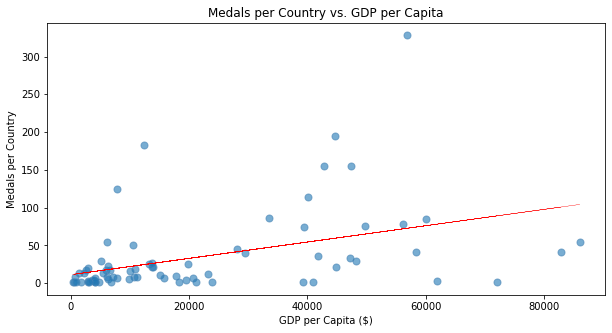

In [40]:
x_values = gender_medalled_GDPpC_df.GDPpC
y_values = gender_medalled_GDPpC_df.Medal_Total
z_values = gender_medalled_GDPpC_df.Medal_Total

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(0,(10,5))
plt.scatter(x_values, y_values, s=50, edgecolor='steelblue', alpha=.6)
plt.plot(x_values,regress_values,"r-",lw=.2)
#plt.annotate(line_eq,(.71,.7),fontsize=12,color="red", rotation=5)
#plt.annotate('USA -->',(.81,7.1),fontsize=12,color="steelblue")
#plt.annotate('Russia -->',(.72,4.0),fontsize=12,color="steelblue")
#plt.annotate('Canada -->',(.82,3.8),fontsize=12,color="steelblue")
#plt.annotate('Germany -->',(.79,3.0),fontsize=12,color="steelblue")
#plt.annotate('China -->',(.68,2.9),fontsize=12,color="steelblue")
plt.title('Medals per Country vs. GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Medals per Country')
#plt.ylim(-1,10)
print(f"The correlation value (r) is: {rvalue}")
plt.show()

## vs GDP

In [41]:
# Read CSV into Pandas DataFrame
raw_GDP_df = pd.read_csv('raw_data/CLEAN-GDPcurrent-USD-countries.csv')

raw_GDP_df.head()

,CountryID,Country,IndicatorName,1970,1971,1972,1973,1974,1975,1976,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,4,Afghanistan,Final consumption expenditure,1.691109e+09,1.826664e+09,1.544444e+09,1.637778e+09,1.984444e+09,2.173333e+09,2.248889e+09,...,1.381317e+10,1.790740e+10,1.987430e+10,2.051016e+10,1.992941e+10,1.963399e+10,1.956615e+10,1.894331e+10,1.891049e+10,1.873642e+10
1,4,Afghanistan,Household consumption expenditure (including N...,1.577102e+09,1.703519e+09,1.440325e+09,1.527366e+09,1.850662e+09,2.026817e+09,2.097279e+09,...,1.238645e+10,1.565480e+10,1.752369e+10,1.793411e+10,1.741045e+10,1.701266e+10,1.707584e+10,1.651919e+10,1.634993e+10,1.619171e+10
2,4,Afghanistan,General government final consumption expenditure,1.140071e+08,1.231456e+08,1.041196e+08,1.104117e+08,1.337824e+08,1.465165e+08,1.516101e+08,...,1.426726e+09,2.252604e+09,2.350610e+09,2.576049e+09,2.518965e+09,2.621337e+09,2.490307e+09,2.424112e+09,2.560560e+09,2.544711e+09
3,4,Afghanistan,Gross capital formation,9.555556e+07,9.999998e+07,1.044445e+08,1.266666e+08,1.888889e+08,2.311111e+08,3.488889e+08,...,2.186826e+09,2.807688e+09,3.033178e+09,3.503714e+09,3.614753e+09,3.745089e+09,3.922627e+09,3.479986e+09,3.904882e+09,4.516001e+09
4,4,Afghanistan,Gross fixed capital formation (including Acqui...,9.555556e+07,9.999998e+07,1.044445e+08,1.266666e+08,1.888889e+08,2.311111e+08,3.488889e+08,...,2.186826e+09,2.807688e+09,3.033178e+09,3.503714e+09,3.614753e+09,3.745089e+09,3.922627e+09,3.479986e+09,3.904882e+09,4.516001e+09


In [42]:
raw_GDP_df = raw_GDP_df.drop(columns=['CountryID'])
raw_GDP_df = raw_GDP_df.rename(columns={'Country': 'Region'})
raw_GDP_df.head(17)

,Region,IndicatorName,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,Final consumption expenditure,1.691109e+09,1.826664e+09,1.544444e+09,1.637778e+09,1.984444e+09,2.173333e+09,2.248889e+09,2.680000e+09,...,1.381317e+10,1.790740e+10,1.987430e+10,2.051016e+10,1.992941e+10,1.963399e+10,1.956615e+10,1.894331e+10,1.891049e+10,1.873642e+10
1,Afghanistan,Household consumption expenditure (including N...,1.577102e+09,1.703519e+09,1.440325e+09,1.527366e+09,1.850662e+09,2.026817e+09,2.097279e+09,2.499326e+09,...,1.238645e+10,1.565480e+10,1.752369e+10,1.793411e+10,1.741045e+10,1.701266e+10,1.707584e+10,1.651919e+10,1.634993e+10,1.619171e+10
2,Afghanistan,General government final consumption expenditure,1.140071e+08,1.231456e+08,1.041196e+08,1.104117e+08,1.337824e+08,1.465165e+08,1.516101e+08,1.806737e+08,...,1.426726e+09,2.252604e+09,2.350610e+09,2.576049e+09,2.518965e+09,2.621337e+09,2.490307e+09,2.424112e+09,2.560560e+09,2.544711e+09
3,Afghanistan,Gross capital formation,9.555556e+07,9.999998e+07,1.044445e+08,1.266666e+08,1.888889e+08,2.311111e+08,3.488889e+08,3.666667e+08,...,2.186826e+09,2.807688e+09,3.033178e+09,3.503714e+09,3.614753e+09,3.745089e+09,3.922627e+09,3.479986e+09,3.904882e+09,4.516001e+09
4,Afghanistan,Gross fixed capital formation (including Acqui...,9.555556e+07,9.999998e+07,1.044445e+08,1.266666e+08,1.888889e+08,2.311111e+08,3.488889e+08,3.666667e+08,...,2.186826e+09,2.807688e+09,3.033178e+09,3.503714e+09,3.614753e+09,3.745089e+09,3.922627e+09,3.479986e+09,3.904882e+09,4.516001e+09
5,Afghanistan,Exports of goods and services,1.711111e+08,2.000000e+08,2.355555e+08,2.244444e+08,3.022222e+08,3.000000e+08,3.377778e+08,3.444445e+08,...,1.797596e+09,1.575030e+09,1.118745e+09,1.152050e+09,1.323227e+09,1.362383e+09,1.418042e+09,1.355360e+09,1.632104e+09,1.670111e+09
6,Afghanistan,Imports of goods and services,2.088889e+08,2.955556e+08,2.888889e+08,2.555556e+08,3.200000e+08,3.377778e+08,3.800000e+08,4.377778e+08,...,5.157675e+09,7.061908e+09,8.095534e+09,1.061512e+10,1.043781e+10,9.495192e+09,9.987756e+09,9.635181e+09,1.093431e+10,8.786300e+09
7,Afghanistan,Gross Domestic Product (GDP),1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155556e+09,2.366667e+09,2.555556e+09,2.953333e+09,...,1.257260e+10,1.607792e+10,1.917047e+10,2.133087e+10,2.161037e+10,2.133066e+10,2.060809e+10,2.023507e+10,2.151550e+10,2.051388e+10
8,Afghanistan,"Agriculture, hunting, forestry, fishing (ISIC ...",8.786878e+08,9.200109e+08,8.016412e+08,8.708712e+08,1.083068e+09,1.188976e+09,1.284010e+09,1.484166e+09,...,3.911436e+09,4.462627e+09,5.171304e+09,5.416564e+09,5.331949e+09,5.136259e+09,4.482949e+09,4.663743e+09,5.090177e+09,4.195836e+09
9,Afghanistan,"Mining, Manufacturing, Utilities (ISIC C-E)",3.804876e+08,3.983764e+08,3.471234e+08,3.771092e+08,4.689650e+08,5.148572e+08,5.560447e+08,6.425133e+08,...,1.668912e+09,2.067834e+09,2.741801e+09,2.780167e+09,2.547569e+09,2.540443e+09,2.452936e+09,2.397103e+09,2.465128e+09,2.414476e+09


In [43]:
GDP_groupedby_Region = raw_GDP_df.groupby('Region')

GDP_df = pd.DataFrame(GDP_groupedby_Region.max())

GDP_df = GDP_df.reset_index()

GDP_df

,Region,IndicatorName,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,"Wholesale, retail trade, restaurants and hotel...",1.748905e+09,1.831129e+09,1.595573e+09,1.733352e+09,2.155579e+09,2.366692e+09,2.555584e+09,2.953365e+09,...,1.381317e+10,1.790740e+10,1.987430e+10,2.133087e+10,2.161037e+10,2.133066e+10,2.060809e+10,2.023507e+10,2.151550e+10,2.051388e+10
1,Albania,"Wholesale, retail trade, restaurants and hotel...",2.345798e+09,2.413182e+09,2.482484e+09,2.553736e+09,2.627172e+09,2.702560e+09,2.780001e+09,2.860395e+09,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138692e+10,1.186136e+10,1.302507e+10,1.505888e+10
2,Algeria,"Wholesale, retail trade, restaurants and hotel...",5.323634e+09,5.653395e+09,7.431972e+09,9.441398e+09,1.350694e+10,1.565680e+10,1.775003e+10,2.099094e+10,...,1.370000e+11,1.610000e+11,2.000000e+11,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.670000e+11,1.740000e+11
3,Andorra,"Wholesale, retail trade, restaurants and hotel...",9.947679e+07,1.131285e+08,1.435060e+08,1.908638e+08,2.360555e+08,2.785143e+08,2.875884e+08,3.213901e+08,...,3.660304e+09,3.355494e+09,3.442273e+09,3.164644e+09,3.281764e+09,3.350604e+09,2.811614e+09,2.877201e+09,3.020852e+09,3.238225e+09
4,Angola,"Wholesale, retail trade, restaurants and hotel...",3.806982e+09,4.007445e+09,4.102155e+09,5.016276e+09,5.626961e+09,4.147433e+09,3.980907e+09,4.344225e+09,...,7.030719e+10,8.416464e+10,1.130000e+11,1.310000e+11,1.400000e+11,1.470000e+11,1.160000e+11,1.010000e+11,1.220000e+11,1.060000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Yemen Democratic (Former),"Wholesale, retail trade, restaurants and hotel...",1.926451e+08,1.780333e+08,1.987563e+08,1.624596e+08,1.744309e+08,1.748030e+08,2.273824e+08,2.929190e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Yugoslavia (Former),"Wholesale, retail trade, restaurants and hotel...",1.455360e+10,1.580174e+10,1.648471e+10,2.147193e+10,2.970621e+10,3.327920e+10,3.756275e+10,4.567289e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,Zambia,"Wholesale, retail trade, restaurants and hotel...",1.544192e+09,1.574165e+09,1.851647e+09,2.349834e+09,2.894548e+09,2.839211e+09,2.813703e+09,2.767426e+09,...,1.532830e+10,2.026540e+10,2.448759e+10,2.484821e+10,2.658525e+10,2.669314e+10,2.085896e+10,2.145266e+10,2.586814e+10,2.728285e+10
219,Zanzibar,"Wholesale, retail trade, restaurants and hotel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.560397e+08,8.167336e+08,8.606234e+08,1.006947e+09,1.147181e+09,1.298364e+09,1.183846e+09,1.262100e+09,1.448096e+09,1.618001e+09


In [44]:
recent_GDP_df = GDP_df[['Region']]
recent_GDP_df['GDP'] = round(GDP_df[['2012','2013','2014',
                                       '2015','2016','2017',
                                       '2018']].mean(axis=1)/(10**9),3)

recent_GDP_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Region,GDP
0,Afghanistan,21.021
1,Albania,12.808
2,Algeria,185.714
3,Andorra,3.106
4,Angola,123.286
...,...,...
216,Yemen Democratic (Former),NaN
217,Yugoslavia (Former),NaN
218,Zambia,24.798
219,Zanzibar,1.281


In [45]:
gender_medalled_GDP_df = pd.merge(
    gender_medalled_df, recent_GDP_df, 
    on='Region', how='left')

gender_medalled_GDP_df.tail()

,Region,Medal_Females,Medal_Males,Medal_Total,Percent_Female,Percent_Male,WPS Index rank,WPS Index value,GDP
70,Qatar,0.0,1.0,1.0,0.0,100.0,72,0.730,186.429
71,Tajikistan,0.0,1.0,1.0,0.0,100.0,96,0.701,8.326
72,Trinidad,0.0,1.0,1.0,0.0,100.0,41,0.788,24.897
73,United Arab Emirates,0.0,1.0,1.0,0.0,100.0,44,0.781,384.429
74,Uzbekistan,0.0,13.0,13.0,0.0,100.0,89,0.710,68.992


In [46]:
### Check
gender_medalled_GDP_df.loc[gender_medalled_GDP_df.GDP.isnull() == True]

,Region,Medal_Females,Medal_Males,Medal_Total,Percent_Female,Percent_Male,WPS Index rank,WPS Index value,GDP


The correlation value (r) is: 0.7845933384166361


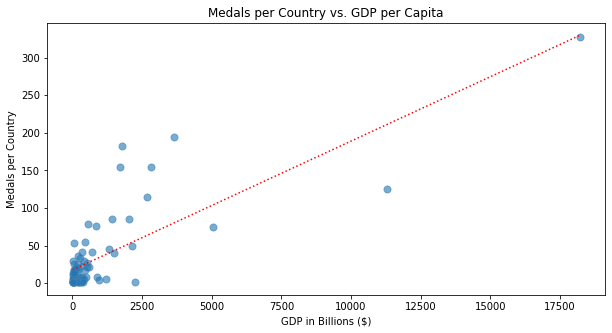

In [47]:
x_values = gender_medalled_GDP_df.GDP
y_values = gender_medalled_GDP_df.Medal_Total

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(0,(10,5))
plt.scatter(x_values, y_values, s=50, edgecolor='steelblue', alpha=.6)
plt.plot(x_values.sort_values(), regress_values.sort_values(), 'r:')
plt.title('Medals per Country vs. GDP per Capita')
plt.xlabel('GDP in Billions ($)')
plt.ylabel('Medals per Country')
print(f"The correlation value (r) is: {rvalue}")
plt.show()

The correlation value (r) is: 0.7845933384166361


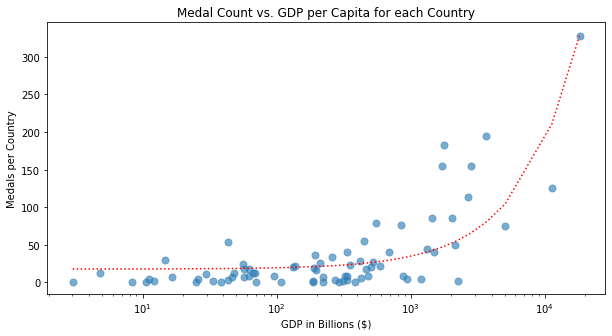

In [48]:
x_values = gender_medalled_GDP_df.GDP
y_values = gender_medalled_GDP_df.Medal_Total

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(0,(10,5))
plt.scatter(x_values, y_values, s=50, edgecolor='steelblue', alpha=.6)
plt.plot(x_values.sort_values(), regress_values.sort_values(), 'r:')
plt.title('Medal Count vs. GDP per Capita for each Country')
plt.xlabel('GDP in Billions ($)')
plt.ylabel('Medals per Country')
plt.xscale('log')
print(f"The correlation value (r) is: {rvalue}")
plt.show()

The correlation value (r) is: 0.7845933384166361


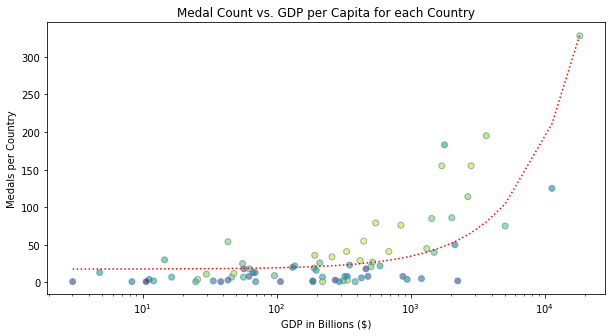

In [49]:
x_values = gender_medalled_GDP_df.GDP
y_values = gender_medalled_GDP_df.Medal_Total
z_values = gender_medalled_GDP_df['WPS Index value']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(0,(10,5))
plt.scatter(x_values, y_values, c=z_values, edgecolor='steelblue', alpha=.6)
plt.plot(x_values.sort_values(), regress_values.sort_values(), 'r:')
plt.title('Medal Count vs. GDP per Capita for each Country')
plt.xlabel('GDP in Billions ($)')
plt.ylabel('Medals per Country')
plt.xscale('log')
print(f"The correlation value (r) is: {rvalue}")
plt.show()

The correlation value (r) is: 0.8163647116153319


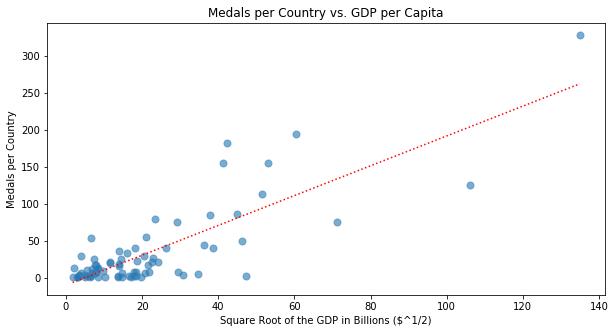

In [50]:
x_values = gender_medalled_GDP_df.GDP**(1/2)
y_values = gender_medalled_GDP_df.Medal_Total
z_values = gender_medalled_GDP_df.Medal_Total

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(0,(10,5))
plt.scatter(x_values, y_values, s=50, edgecolor='steelblue', alpha=.6)
plt.plot(x_values.sort_values(), regress_values.sort_values(), 'r:')
plt.title('Medals per Country vs. GDP per Capita')
plt.xlabel('Square Root of the GDP in Billions ($^1/2)')
plt.ylabel('Medals per Country')
#plt.xlim(-200,3000)
#plt.ylim(-5,200)

print(f"The correlation value (r) is: {rvalue}")
plt.show()

In [51]:
gender_medalled_GDP_pC_df = pd.merge(
    gender_medalled_GDP_df, recent_GDPpC_df, 
    on='Region', how='left')

gender_medalled_GDP_pC_df.tail()

,Region,Medal_Females,Medal_Males,Medal_Total,Percent_Female,Percent_Male,WPS Index rank,WPS Index value,GDP,GDPpC
70,Qatar,0.0,1.0,1.0,0.0,100.0,72,0.730,186.429,72035.0
71,Tajikistan,0.0,1.0,1.0,0.0,100.0,96,0.701,8.326,929.7
72,Trinidad,0.0,1.0,1.0,0.0,100.0,41,0.788,24.897,18201.0
73,United Arab Emirates,0.0,1.0,1.0,0.0,100.0,44,0.781,384.429,40966.3
74,Uzbekistan,0.0,13.0,13.0,0.0,100.0,89,0.710,68.992,2235.7


The correlation value (r) is: 0.7845933384166361


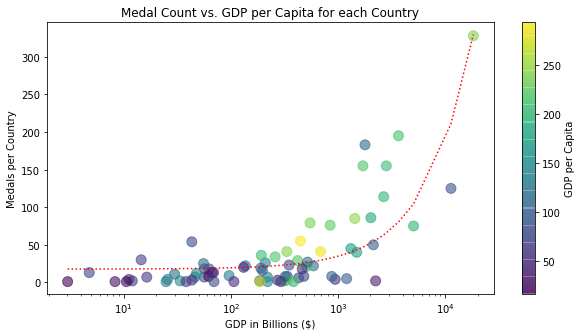

In [52]:
x_values = gender_medalled_GDP_pC_df.GDP
y_values = gender_medalled_GDP_pC_df.Medal_Total
z_values = gender_medalled_GDP_pC_df.GDPpC

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(0,(10,5))
plt.scatter(x_values, y_values, c=z_values**(1/2), s=100, alpha=.6)
plt.plot(x_values.sort_values(), regress_values.sort_values(), 'r:')
plt.title('Medal Count vs. GDP per Capita for each Country')
plt.xlabel('GDP in Billions ($)')
plt.ylabel('Medals per Country')
plt.xscale('log')
plt.colorbar(label='GDP per Capita')
print(f"The correlation value (r) is: {rvalue}")
plt.show()

In [53]:
coefficient = stats.pearsonr(
    gender_medalled_GDP_pC_df.GDP,gender_medalled_GDP_pC_df.Medal_Total)[0]
pvalue = stats.pearsonr(
    gender_medalled_GDP_pC_df.GDP,gender_medalled_GDP_pC_df.Medal_Total)[1]

print(f"The correlation is {round(coefficient,4)} and the p-value is {pvalue}")

The correlation is 0.7846 and the p-value is 8.236495577896968e-17
